In [14]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import nestkit_modified as nestkit
import brewtools

from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import InterpolatedUnivariateSpline
from matplotlib.ticker import AutoMinorLocator, ScalarFormatter, FuncFormatter, LogLocator, MultipleLocator

In [18]:
fontsize = 10
labelsize=12

tick_labelsize=10

tick_length = 5
tick_width = 1

fig_width = 3.5

fig_width_2 = 7.25

In [6]:
runname ="W0359_5_knots"

argfile = "/Users/harshil/PycharmProjects/Brewster/Retrieved_results/Nested_sampling_files/W0359/"+runname+"_runargs.pic"

runargs = brewtools.pickle_load(argfile)

gases_myP,chemeq,dist,dist_err,cloudtype,do_clouds,gasnum,gaslist,cloudnum,inlinetemps,coarsePress,press,inwavenum,linelist,cia,ciatemps,use_disort,fwhm,obspec,proftype,do_fudge, prof,do_bff,bff_raw,ceTgrid,metscale,coscale, wavelength_cutoff, sf, sf_err = runargs

ndim,pnames = nestkit.countdims(runargs, plist=True)

In [8]:
samples = np.loadtxt("/Users/harshil/PycharmProjects/Brewster/Retrieved_results/Retrieved_posterior_samples/W0359_samples.txt")
TP = np.loadtxt("/Users/harshil/PycharmProjects/Brewster/Retrieved_results/Retrieved_thermal_profile/W0359_thermal_profile.txt")

In [9]:
vmr = np.ones([gasnum.size,3])
for i in range (0,gasnum.size):
    vmr[i,:] = np.percentile(samples[:,i], [16, 50, 84])

In [30]:
# grab BFF and Chemical grids
gaslist = ['h2o', 'ch4', 'co', 'co2', 'nh3', 'h2s', 'K', 'Na', 'ph3']
chemeq=1
bff_raw,ceTgrid,metscale,coscale,gases_myP = nestkit.sort_bff_and_CE(chemeq,"chem_eq_tables_P3K.pic",press,gaslist)

# what metallicity and C/O ratio do we want to plot?
mh  = -0.00
co = (0.55/0.55)

logP, profT = np.log10(press), TP[:, 2]

nlayers = press.size
mfit = interp1d(metscale,gases_myP,axis=0)
gases_myM = mfit(mh)
cfit = interp1d(coscale,gases_myM,axis=0)
invmr = cfit(co)
ng = invmr.shape[2]
ngas = ng - 3
ab = np.zeros([nlayers,ngas],dtype='d')
temp= profT #Tlays[:,2]
for p in range(0,nlayers):
    for g in range(3,ng):
        tfit = InterpolatedUnivariateSpline(ceTgrid,invmr[:,p,g])
        ab[p,g-3]= tfit(temp[p])

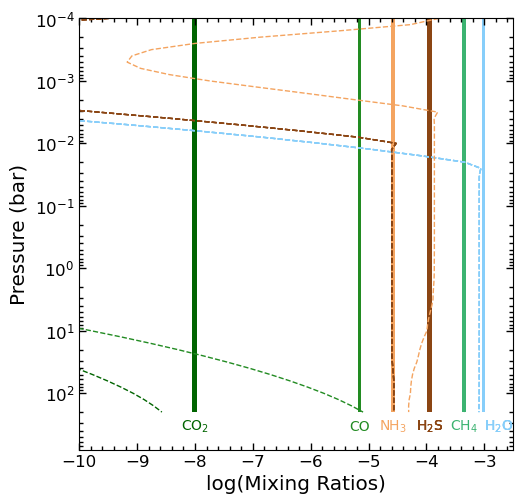

In [31]:
label = ['H$_{2}$O','CH$_{4}$','CO','CO$_{2}$','NH$_{3}$','H$_{2}$S','K','Na','PH$_{3}$']
color = ['lightskyblue','mediumseagreen','forestgreen','darkgreen','sandybrown','saddlebrown','lightsteelblue','slategrey','violet']

fig, axs = plt.subplots(figsize=(fig_width*1.6, fig_width*1.6))
plt.rc('font',family='sans serif')

xvals_retrieved = np.zeros(ngas)
xvals_eq = np.zeros(ngas)

linewidth=1

for i in range(1,ngas-4):
    axs.plot(ab[:,0],press,'--',linewidth=linewidth, color=color[0],label=label[0])
    axs.plot(ab[:,i],press,'--',linewidth=linewidth, color=color[i],label=label[i])
    axs.plot(ab[:,5],press,'--',linewidth=linewidth, color=color[5],label=label[5])
    #axs.plot([vmr[i,1],vmr[i,1]],[2.3,-4.0],'-',label=label[i], linewidth=0)
    axs.fill_betweenx([10**2.3,10**-4.0],[vmr[0,0],vmr[0,0]],[vmr[0,2],vmr[0,2]], facecolor=color[0], alpha=1,linewidth=1)
    axs.fill_betweenx([10**2.3,10**-4.0],[vmr[i,0],vmr[i,0]],[vmr[i,2],vmr[i,2]], facecolor=color[i], alpha=1,linewidth=1)
    axs.fill_betweenx([10**2.3,10**-4.0],[vmr[5,0],vmr[5,0]],[vmr[5,2],vmr[5,2]], facecolor=color[5], alpha=1,linewidth=1)
    axs.text(0.5*(vmr[0,0]+vmr[0,2]), 10**((2.9+2.3)*0.5), label[0], fontsize=fontsize, color=color[0])
    axs.text(0.5*(vmr[5,0]+vmr[5,2]), 10**((2.9+2.3)*0.5), label[5],  horizontalalignment='center', fontsize=fontsize, color=color[5])
    axs.text(0.5*(vmr[i,0]+vmr[i,2]), 10**((2.9+2.3)*0.5), label[i], horizontalalignment='center', fontsize=fontsize, color=color[i])

axs.set_xlim(left=-10, right=-2.5)
axs.set_ylim(top=10**-4, bottom=10**2.9)

axs.tick_params(axis='both',which='major', direction='in', top=True, right=True, length=tick_length, width=tick_width, labelsize=tick_labelsize*1.2)
axs.tick_params(axis='both',which='minor', direction='in',  top=True, right=True, length=0.6*tick_length, width=tick_width, labelsize=tick_labelsize*1.2)

#axs.tick_params(axis='both', which='both', direction='in', top=True, right=True)
axs.xaxis.set_minor_locator(AutoMinorLocator())
#axs.yaxis.set_minor_locator(AutoMinorLocator())

#axs.legend(loc=6)

axs.set_xlabel(r'log(Mixing Ratios)', fontsize=labelsize*1.2)
axs.set_ylabel(r'Pressure (bar)', fontsize=labelsize*1.2)

axs.set_yscale('log')

#plt.savefig("/Users/harshil/Documents/Retreival_results/W0359/Chemical_profiles.pdf",format='pdf', bbox_inches = "tight")

plt.show()